In [1]:
import numpy as np 
import pandas as pd 

# visualization
import seaborn as sns
import matplotlib.pyplot as plt


### Data Import and Examination

#### Initial Examination

In [2]:
# Prof provided the train test splitting code, this csv has already went through that
# The first 22500 rows will be train set and the last 7500 rows are test set
df_card = pd.read_csv('card_splitted.csv',skiprows=0)

We first examine some sample from the dataset

In [3]:
df_card.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Then we take a more in-depth look at the data

In [6]:
df_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Data Pre-processing and Inspection

We observe several issues with the data:

1. Weird labels
2. Null Values & Repeated Values?
3. Outliers in the data?
4. Feature selection
5. Encoding the categorical variables?
6. SMOTE to deal with imbalanced classes
7. Linear Seperability check

In [7]:
# 1. Data cleaning
# See all the counts: barplot can be used in report

#df_card.SEX.value_counts() #ok
#df_card.EDUCATION.value_counts() #0,5,6 meaning???
#df_card.MARRIAGE.value_counts() # 0 meaning???
#df_card.AGE.value_counts() #ok
#df_card.PAY_0.value_counts() # what does -1,-2,0 means??? 
#df_card.PAY_2.value_counts() # same as above


filtering = (df_card.EDUCATION == 5) | (df_card.EDUCATION == 6) | (df_card.EDUCATION == 0)
df_card.loc[filtering, 'EDUCATION'] = 4
#df_card.EDUCATION.value_counts()

df_card.loc[df_card.MARRIAGE == 0, 'MARRIAGE'] = 3
#df_card.MARRIAGE.value_counts()

filtering = (df_card.PAY_0 == -2) | (df_card.PAY_0 == -1) | (df_card.PAY_0 == 0)
df_card.loc[filtering, 'PAY_0'] = 0

filtering = (df_card.PAY_2 == -2) | (df_card.PAY_2 == -1) | (df_card.PAY_2 == 0)
df_card.loc[filtering, 'PAY_2'] = 0

filtering = (df_card.PAY_3 == -2) | (df_card.PAY_3 == -1) | (df_card.PAY_3 == 0)
df_card.loc[filtering, 'PAY_3'] = 0

filtering = (df_card.PAY_4 == -2) | (df_card.PAY_4 == -1) | (df_card.PAY_4 == 0)
df_card.loc[filtering, 'PAY_4'] = 0

filtering = (df_card.PAY_5 == -2) | (df_card.PAY_5 == -1) | (df_card.PAY_5 == 0)
df_card.loc[filtering, 'PAY_5'] = 0

filtering = (df_card.PAY_6 == -2) | (df_card.PAY_6 == -1) | (df_card.PAY_6 == 0)
df_card.loc[filtering, 'PAY_6'] = 0

30000
False


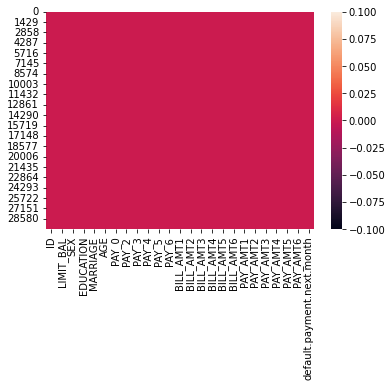

In [8]:
# 2. Repeated and missing values

#check duplicate
print(df_card['ID'].nunique()) #no duplicates

#check NA values
import seaborn as sns
df_card_copy1 = df_card.copy()
sns.heatmap(df_card_copy1.isnull())

print(df_card.isnull().values.any()) # cool, no NA 


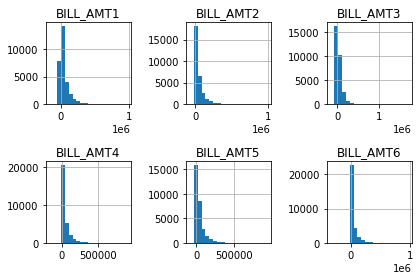

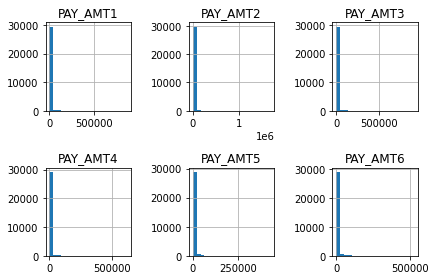

In [9]:
# 3. Outliers check
# only need to check those BILL_AMT and PAY_AMT

# helper method to plot # ugly plot, we can consider use R to plot
def draw_histograms(df, vars, n_r, n_c, n_b):
    fig=plt.figure()
    for i, variable_name in enumerate(vars):
        ax=fig.add_subplot(n_r,n_c,i+1)
        df[variable_name].hist(bins=n_b,ax=ax)
        ax.set_title(variable_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

# Not very nice plot, should use R. Also plot limit_bal:
bills = df_card[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_histograms(bills, bills.columns, 2, 3, 20)
pay = df_card[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
draw_histograms(pay, pay.columns, 2, 3, 20)
# Although being statistically outliers, the values are still within sensible range
# (They are just normal rich clients)
# So no need to remove them

# Scaling
# Theoretically Scaling is not necessary as most of our models will figure out the weight eventually,
# But scaling often helps in certain algorithm, for example regression, due to some precision problem in matrix calculation
# Should we just do it to show we have learned stuff?
from sklearn.preprocessing import MinMaxScaler
df_card_scaled = df_card.copy()
mms = MinMaxScaler()
df_card_scaled[['LIMIT_BAL','BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']] = pd.DataFrame(mms.fit_transform(df_card_scaled[['LIMIT_BAL','BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]))


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


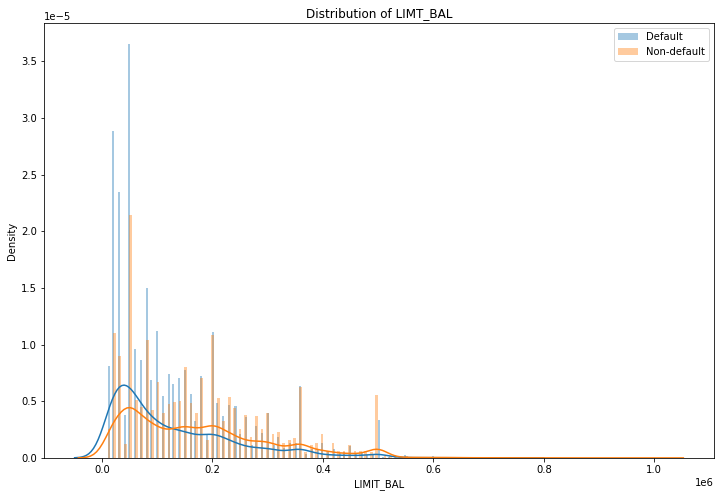

In [11]:
class_0 = df_card.loc[df_card['default.payment.next.month'] == 0]["LIMIT_BAL"]
class_1 = df_card.loc[df_card['default.payment.next.month'] == 1]["LIMIT_BAL"]
f, ax = plt.subplots(1, 1,figsize = (12,8))
plt.title('Distribution of LIMT_BAL')
sns.distplot(class_1,kde=True,bins=200,ax=ax, label = "Default")
sns.distplot(class_0,kde=True,bins=200,ax=ax, label = "Non-default")
ax.legend()

In [12]:
df_card[df_card.LIMIT_BAL > 700000][['LIMIT_BAL', 'PAY_2', 'PAY_3', 'BILL_AMT3', 
                          'PAY_AMT2', 'BILL_AMT2', 'default.payment.next.month']]

,LIMIT_BAL,PAY_2,PAY_3,BILL_AMT3,PAY_AMT2,BILL_AMT2,default.payment.next.month
1642,1000000,0,0,535020,50723,983931,0
2527,710000,0,0,0,0,0,1
2769,750000,0,0,74635,74640,99628,0
2997,710000,0,0,34854,3696,31719,0
3427,750000,0,0,3329,3691,15344,0
4412,710000,0,0,940,944,16849,0
7577,750000,0,0,92767,2330,163441,0
7971,720000,0,0,105582,8043,112933,0
9840,750000,0,0,401003,401003,9655,0
11158,800000,0,0,64535,64657,5552,0


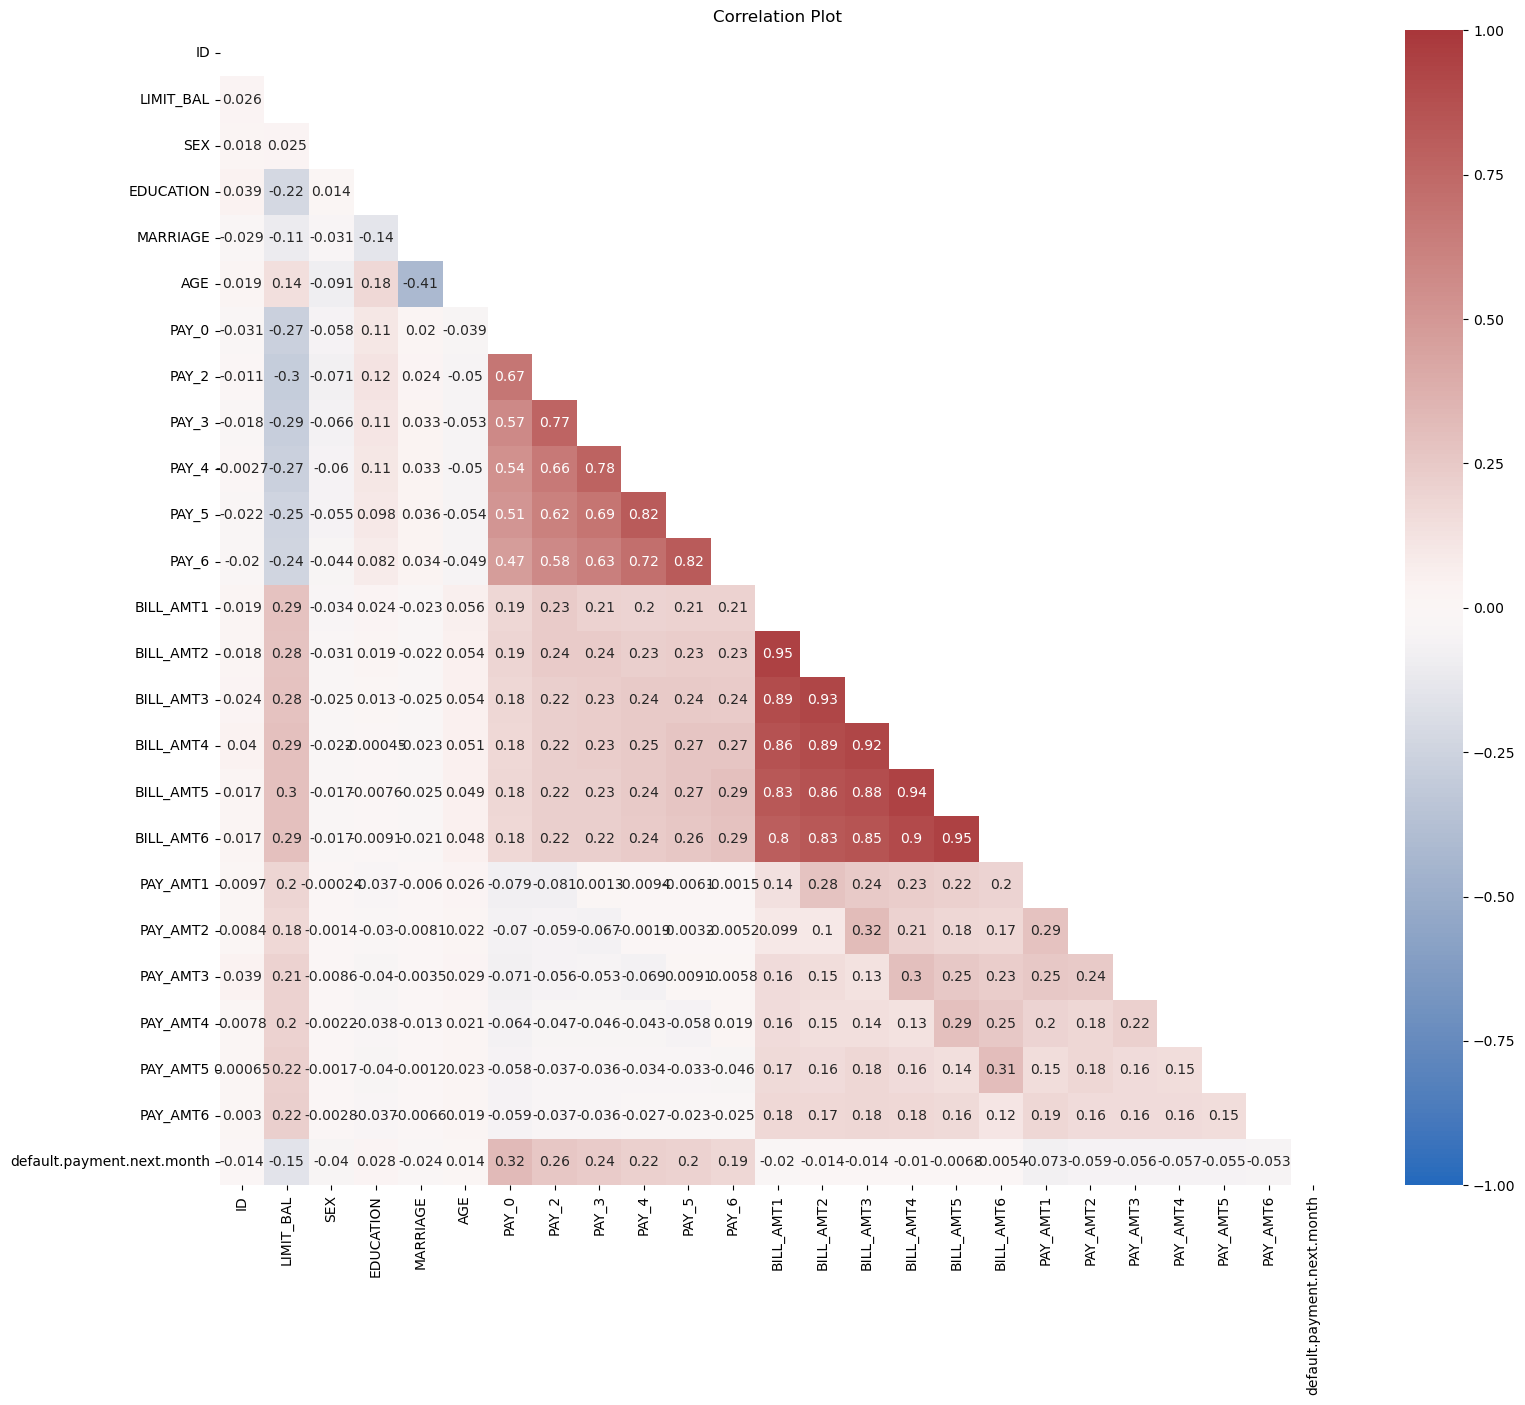

NameError: name 'cmap' is not defined

In [4]:
# 4. Feature Selections
# Method 1. correlation plot

# I am using the original value (before scale) to do 1)correlation & 2)chi-square & 3)info gain. Because:
# 1) Correlation will remain the same so it does not matter
# 2) Scaled value is very small it will bias our chi-square estimates
# 3) Info gain also remains the same
X = df_card.iloc[:,1:-1] # all the variables
y = df_card.iloc[:,-1] # labels
#X.columns

import matplotlib.pyplot as plt
import seaborn as sns

#Find the correlation of the dataset

corr= df_card.corr()

# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(18,15))
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, mask = mask, vmin=-1.0, vmax=1, cmap ='vlag')
plt.title('Correlation Plot')
plt.show()

(array([7.10658442e+07, 7.14636693e+00, 1.03370155e+01, 3.98213116e+00,
       1.38584400e+01, 7.62888231e+03, 6.44625798e+03, 5.07927168e+03,
       4.86160750e+03, 4.74706792e+03, 4.04938834e+03, 1.23905340e+06,
       6.29576010e+05, 6.03923839e+05, 2.92176003e+05, 1.25354899e+05,
       7.17824533e+04, 7.72884740e+06, 9.22947597e+06, 5.63096908e+06,
       4.92666725e+06, 4.43348410e+06, 5.14163850e+06]), array([0.        , 0.0075116 , 0.00130389, 0.04598535, 0.00019711,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ]))


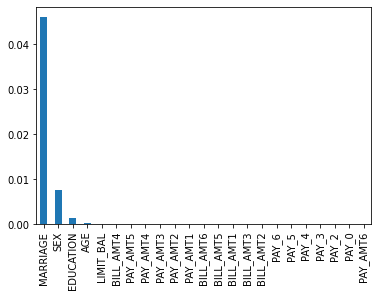

In [14]:
# 4. Feature Selections
# Method 2. Chi-square

from sklearn.feature_selection import chi2
chi_scores = chi2(np.clip(X,0,10000000),y) # clip is to ensure no negative values
print(chi_scores)

p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()


LIMIT_BAL    0.013710
SEX          0.001693
EDUCATION    0.006366
MARRIAGE     0.004965
AGE          0.000400
PAY_0        0.077651
PAY_2        0.050492
PAY_3        0.037682
PAY_4        0.036078
PAY_5        0.028263
PAY_6        0.025529
BILL_AMT1    0.010993
BILL_AMT2    0.006273
BILL_AMT3    0.008142
BILL_AMT4    0.003333
BILL_AMT5    0.005264
BILL_AMT6    0.005457
PAY_AMT1     0.022997
PAY_AMT2     0.014094
PAY_AMT3     0.020713
PAY_AMT4     0.014922
PAY_AMT5     0.013132
PAY_AMT6     0.010223
dtype: float64

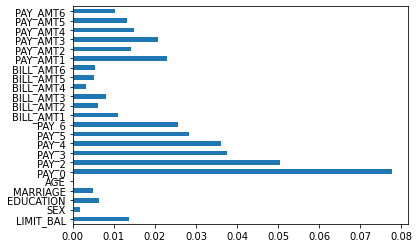

In [15]:
# 4. Feature Selections
# Method 3. Mutual Info Classifier. Estimates mutual information among the features and look at the information gain by each of the variables.
from sklearn.feature_selection import mutual_info_classif
IG = mutual_info_classif(X, y,random_state=42)
feature_IG = pd.Series(IG, df_card.columns[1:len(df_card.columns)-1])
feature_IG.plot(kind = 'barh')
feature_IG

# All have some info gain

### Conclusion for Feature selection:
I do not think we should remove any of them because we did not get significant information in any of the above method suggesting which feature is redundant.

And also, major reasons to do feature selection includes:
1) To reduce dimensionality to avoid "Curse of Dimensionality". But:
  1) we have sufficiently big size of data (30000, and even more through synthesis of data).
  2) models like random forest or logistic regression does not really get influenced much.
So we do not have to remove some of the features due to the above reasons.

2) Another reason for feature selection is to remove noise, but:

  1)Although age & marriage & sex does not appear to be very useful as shown by the packages, there are definitely important demographics to determine customer's behavior so we should not remove them.

  2)Also,Looking at all the "PAY_AMT"s, there would contain repeated information and thus we could consider to remove some of them. But it can be also seen that the correlation between them turns out to be low. Meaning each column does also include new useful information. Also, we can argue that it such record over different time provides trends of a person's economic situation and one's spending pattern. Thus all is useful information.
Same goes for all the "BILL_AMT"s & "PAY"s.

In [16]:
# 5. Encoding
# I do not think it is going to be useful because of the ordinal nature of the categorical variables
# Liek for education, increasing number already denotes lowering education level
# For marriage and sex, it is just two levels (with one unknown), so it is also not necessary to one hot encode it.
# Note one hot encoding will introduce some redundancy but it should not be a problem

# But I will just do it
df_card_scaled_encoded = df_card_scaled.copy()

# encode SEX
one_hot = pd.get_dummies(df_card_scaled_encoded['SEX'])
one_hot.rename(columns={1: 'MALE', 2: 'FEMALE'}, inplace=True)

df_card_scaled_encoded = df_card_scaled_encoded.drop('SEX',axis = 1)
df_card_scaled_encoded = df_card_scaled_encoded.join(one_hot)
df_card_scaled_encoded = df_card_scaled_encoded.drop('MALE',axis = 1) # We only need 

# encode Marriage
one_hot = pd.get_dummies(df_card_scaled_encoded['MARRIAGE'])
one_hot.rename(columns={1: 'MARRIED', 2: 'SINGLE',3:'OTHERS'}, inplace=True)

df_card_scaled_encoded = df_card_scaled_encoded.drop('MARRIAGE',axis = 1)
df_card_scaled_encoded = df_card_scaled_encoded.join(one_hot)
df_card_scaled_encoded = df_card_scaled_encoded.drop('OTHERS',axis = 1)

# Remove those with high corr with each other:
df_card_scaled_encoded = df_card_scaled_encoded.drop('BILL_AMT2',axis = 1)
df_card_scaled_encoded = df_card_scaled_encoded.drop('BILL_AMT4',axis = 1)
df_card_scaled_encoded = df_card_scaled_encoded.drop('BILL_AMT6',axis = 1)
df_card_scaled_encoded = df_card_scaled_encoded.drop('PAY_5',axis = 1)
df_card_scaled_encoded = df_card_scaled_encoded.drop('PAY_3',axis = 1)


In [17]:
df_card_scaled_encoded

,ID,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_4,PAY_6,BILL_AMT1,BILL_AMT3,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,FEMALE,MARRIED,SINGLE
0,1,0.010101,2,24,2,2,0,0,0.149982,0.086723,...,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1,1,1,0
1,2,0.111111,2,26,0,2,0,2,0.148892,0.087817,...,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1,1,0,1
2,3,0.080808,2,34,0,0,0,0,0.172392,0.093789,...,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0,1,0,1
3,4,0.040404,2,37,0,0,0,0,0.188100,0.113407,...,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0,1,1,0
4,5,0.040404,2,57,0,0,0,0,0.154144,0.106020,...,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,4218,0.040404,2,33,1,2,2,2,0.182055,0.108506,...,0.002404,0.000000,0.003794,0.000000,0.018287,0.000000,1,0,0,1
29996,25066,0.232323,3,50,0,0,0,0,0.270609,0.157924,...,0.005442,0.002893,0.005617,0.006770,0.010571,0.009475,0,0,1,0
29997,687,0.010101,3,41,0,0,0,0,0.147209,0.086747,...,0.000000,0.000435,0.000335,0.001610,0.001172,0.001892,1,1,1,0
29998,3301,0.020202,3,41,1,2,0,0,0.172815,0.102359,...,0.000000,0.001187,0.002455,0.000000,0.002579,0.002081,0,1,1,0


In [18]:
# 6. Imbalanced classes, so need to over / under sample
print(df_card_scaled_encoded['default.payment.next.month'].value_counts())
# Note that onyl 22% of the overall class is of class 1. (Meaning default)
# I would expect some model to predict all 0 and get a 78% accuracy. But this is obviously not useful!

# So we need to over sample / undersample our data
# undersample is usually not an option, and here becasue our data set is not that big, we would not want to do it either
# Normal oversampling technique (simply duplicating the minority class data) hurts the variability of the data badly so it is not favored.
# Thus we choose to use Synthetic Minority Oversampling Technique (SMOTE) to random generate minority class data points
  ### We can show a plot of what SMOTE is doing
# Some further considerations: 
# Research from Balgus & Lusa (2013) argues that adding synthesised data could lead to correlation and reduction in variability in the data.
# This in turn would severely affect the capacity of some models such as random forest



# split featues and label
#X = df_card.iloc[:,1:-1] # all the variables
#y = df_card.iloc[:,-1] # labels

# Important!!! Train test split first, then SMOTE
# Otherwise it will lead to data snooping and unreliable result
# The data I read in is already splitted using prof given code. So I will just split it based on index

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1234)
X_train = df_card_scaled_encoded.iloc[0:22501,1:]
X_test = df_card_scaled_encoded.iloc[22500:30001,1:]
y_train = df_card_scaled_encoded.iloc[0:22501,-4]
y_test = df_card_scaled_encoded.iloc[22500:30001,-4]

del X_train['default.payment.next.month']
del X_test['default.payment.next.month']


# Now SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=1)
np.random.seed(1)

X_train_balanced, y_train_balanced = oversample.fit_resample(X_train, y_train)
#X_test_balanced, y_test_balanced = oversample.fit_resample(X_test, y_test)

# Export to csv
smoteTrain = X_train_balanced.reset_index(drop=True).join(y_train_balanced)
smoteTrain.to_csv('/content/drive/MyDrive/BT2103/smoteTrain.csv', index=False)

#smoteTest = X_test_balanced.reset_index(drop=True).join(y_test_balanced)
#smoteTest.to_csv('/content/drive/MyDrive/BT2103/smoteTest.csv', index=False)

testSet = X_test.join(y_test)
testSet.to_csv('/content/drive/MyDrive/BT2103/testSet.csv', index=False)

0    23364
1     6636
Name: default.payment.next.month, dtype: int64


In [19]:
X_train_balanced.reset_index(drop=True).join(y_train_balanced)

,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_4,PAY_6,BILL_AMT1,BILL_AMT3,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,FEMALE,MARRIED,SINGLE,default.payment.next.month
0,0.010101,2,24,2,2,0,0,0.149982,0.086723,0.080648,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1,1,0,1
1,0.111111,2,26,0,2,0,2,0.148892,0.087817,0.084074,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1,0,1,1
2,0.080808,2,34,0,0,0,0,0.172392,0.093789,0.095470,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,1,0,1,0
3,0.040404,2,37,0,0,0,0,0.188100,0.113407,0.109363,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,1,1,0,0
4,0.040404,2,57,0,0,0,0,0.154144,0.106020,0.099633,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35061,0.102678,3,46,2,2,0,0,0.270083,0.134853,0.128779,0.004159,0.000122,0.003573,0.002757,0.004322,0.003109,1,1,0,1
35062,0.150920,3,43,0,0,0,0,0.244999,0.148443,0.165457,0.006728,0.003024,0.004393,0.005356,0.007283,0.007054,1,1,0,1
35063,0.252458,2,39,0,0,0,0,0.324281,0.201808,0.178504,0.010654,0.005324,0.003994,0.006450,0.005742,0.001327,1,0,1,1
35064,0.040404,2,48,2,0,0,0,0.173189,0.099060,0.098800,0.003322,0.000833,0.000947,0.003951,0.001736,0.001254,0,0,0,1


In [27]:
# smote does not create both married and single column
sum((X_train_balanced.MARRIED == 1) & (X_train_balanced.SINGLE == 1))

0

We are done with all the data cleaning and processing.
Just one more thing. I would want to investigate the linear separability of the data. As it can be quite important in logistic regression.
I will use a linear SVM and T-SNE to see.

In [ ]:
# 7. Linear Separability Check
# Method 1. SVM

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.svm import SVC
clf_svm = SVC(random_state=1,kernel='linear')
clf_svm.fit(X_train_balanced, y_train_balanced) #This may take up to 5 mins. It is normal. Somehow SVM from sklearn is very slow...

y_predict_balanced = clf_svm.predict(X_test)
print(sum(y_predict_balanced == y_test))
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict_balanced)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict_balanced)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict_balanced)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict_balanced)))

sns.set_style('white') 
class_names = ['0','1']

print(pd.DataFrame(confusion_matrix(y_test,y_predict_balanced))) # left is true label, bottom is predicted

5866
Accuracy Score is 0.78213
Recall Score is 0.51019
Precision Score is 0.51019
F1 Score is 0.51019
      0    1
0  5015  817
1   817  851


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 35066 samples in 0.001s...
[t-SNE] Computed neighbors for 35066 samples in 23.148s...
[t-SNE] Computed conditional probabilities for sample 1000 / 35066
[t-SNE] Computed conditional probabilities for sample 2000 / 35066
[t-SNE] Computed conditional probabilities for sample 3000 / 35066
[t-SNE] Computed conditional probabilities for sample 4000 / 35066
[t-SNE] Computed conditional probabilities for sample 5000 / 35066
[t-SNE] Computed conditional probabilities for sample 6000 / 35066
[t-SNE] Computed conditional probabilities for sample 7000 / 35066
[t-SNE] Computed conditional probabilities for sample 8000 / 35066
[t-SNE] Computed conditional probabilities for sample 9000 / 35066
[t-SNE] Computed conditional probabilities for sample 10000 / 35066
[t-SNE] Computed conditional probabilities for sample 11000 / 35066
[t-SNE] Computed conditional probabilities for sample 12000 / 35066
[t-SNE] Computed conditional probabilities for sa

[Text(0.5, 1.0, 'Iris data T-SNE projection')]

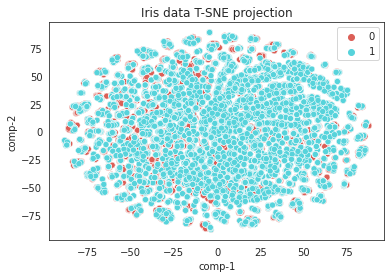

In [ ]:
# Linear Separability Checks
# Method 2. TSNE

from sklearn.manifold import TSNE
from keras.datasets import mnist
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd  

# I only looked at the training set. We can look at the test set separately or combined
x = X_train_balanced
y = y_train_balanced
tsne = TSNE(n_components=2, verbose=1, random_state=42) # May take up to 5 mins.
z = tsne.fit_transform(x) 

df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="Iris data T-SNE projection") 

### Conclusion for Linear Separability:
1. SVM did not yield 100% accuracy, suggesting its incapability to separate the data with a linear kernel, suggesting linear inseparability

2. TSNE method maps all the features into 2 principal features (kind of PCA) and allow us to visualize it. We can then clearly see that the classes is mixed up and hardly separable.

In [ ]:
df_train = pd.read_csv('smoteTrain.csv')
df_test = pd.read_csv('testSet.csv')

In [ ]:
print(df_train.shape)
print(df_test.shape)

(35066, 20)
(7500, 20)


In [ ]:
X_train = df_train.iloc[:,0:-1] # all the variables
y_train = df_train.iloc[:,-1] # labels

X_test = df_test.iloc[:,0:-1] # all the variables
y_test = df_test.iloc[:,-1] # labels

In [ ]:
y_train.value_counts()

1    17533
0    17533
Name: default.payment.next.month, dtype: int64

In our dataset, we label 'defaulted' as positive (1) and 'non defaulted' as negative (0).


#### Logistic Regression

In [ ]:
print("--------LR-------")
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))


--------LR-------
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      5832
           1       0.47      0.56      0.51      1668

    accuracy                           0.76      7500
   macro avg       0.67      0.69      0.68      7500
weighted avg       0.78      0.76      0.77      7500

      0     1
0  4769  1063
1   726   942


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


##### Bias Variance trade off

In [ ]:
# Let's plot the bias variance plot to see 
# Can take up to 10 mins
import sklearn
import autograd.numpy as grad_np

n_iterations = 30 # Number of iterations used to calculate the average losses, set this high to have smooth plot
max_points = 200
 # Number of points in the training set, set this high to extend x-axis

training_losses = grad_np.zeros(max_points)
expected_losses = grad_np.zeros(max_points)
eps = 1e-10


# Using:
# X_train
# y_train
# X_test
# y_test


for num_points in range(10, max_points+1):
  
    training_loss = 0.0
    expected_loss = 0.0

    for i in range(n_iterations):
        # generate random samples for training
        sample_x = X_train.sample(num_points)
        sample_y = y_train[sample_x.index]

        model = LogisticRegression()
        model.fit(sample_x, sample_y)

        training_loss += sklearn.metrics.log_loss(y_true = sample_y, y_pred = np.clip(model.predict_proba(sample_x),eps,1-eps))
        expected_loss += sklearn.metrics.log_loss(y_true = y_test, y_pred = np.clip(model.predict_proba(X_test),eps,1-eps))
    training_losses[num_points - 1] = training_loss / n_iterations
    expected_losses[num_points - 1] = expected_loss / n_iterations

流式输出内容被截断，只能显示最后 5000 行内容。
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

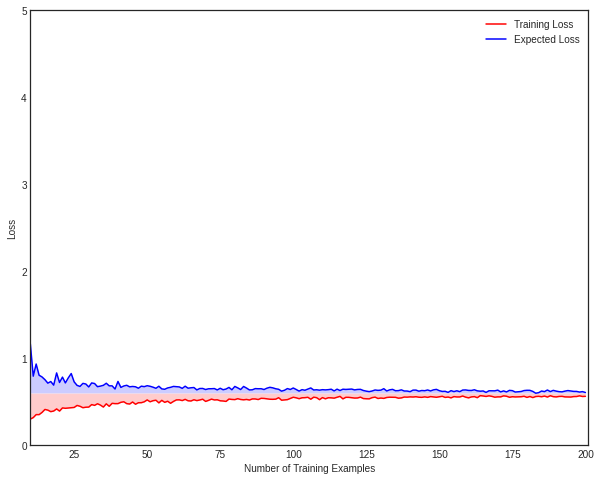

In [ ]:
fig, ax = plt.subplots()

plt.style.use('seaborn-white')
plt.xlim(10, max_points + 1)
plt.ylim(0, 5)
plt.xlabel('Number of Training Examples')
plt.ylabel('Loss')
plt.rcParams['figure.figsize'] = [10, 8]
plt.plot(range(1, max_points + 1), training_losses, 'r', label='Training Loss')
plt.plot(range(1, max_points + 1), expected_losses, 'b', label='Expected Loss')
ax.fill_between(range(1, max_points + 1), 0.6, expected_losses, facecolor='blue', alpha=0.2)
ax.fill_between(range(1, max_points + 1), 0.6, training_losses, facecolor='red', alpha=0.2)
plt.legend()
plt.show()
#training_losses

##### ROC curve

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.748


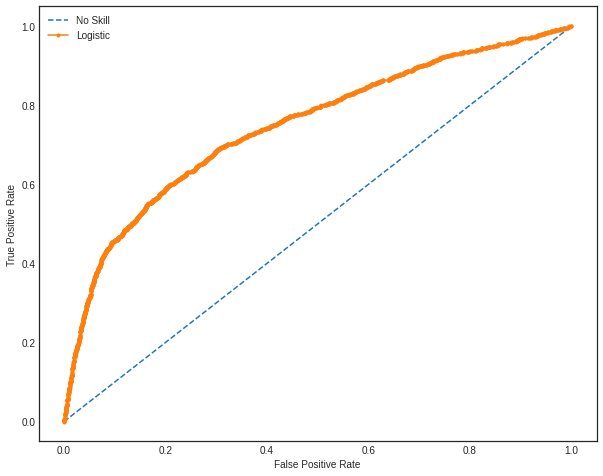

In [ ]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

model = LogisticRegression()
model.fit(X_train, y_train)

# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


In [ ]:
# Running all blocks in one shot may cause long running time.
import pandas as pd
import numpy as np
import sklearn 
import sklearn.datasets
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [ ]:
import numpy as np
import statsmodels.api as sm
x_columns = list(X_train.columns)
def get_stats():
    x = X_train[x_columns]
    results = sm.OLS(y_train, x).fit()
    print(results.summary())
get_stats()

                                     OLS Regression Results                                    
Dep. Variable:     default.payment.next.month   R-squared (uncentered):                   0.584
Model:                                    OLS   Adj. R-squared (uncentered):              0.584
Method:                         Least Squares   F-statistic:                              2591.
Date:                        Wed, 16 Nov 2022   Prob (F-statistic):                        0.00
Time:                                09:36:58   Log-Likelihood:                         -22220.
No. Observations:                       35066   AIC:                                  4.448e+04
Df Residuals:                           35047   BIC:                                  4.464e+04
Df Model:                                  19                                                  
Covariance Type:                    nonrobust                                                  
                 coef    std err        

In [ ]:
!pip install mlxtend
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

logreg = LogisticRegression() 
sfs = SFS(logreg, 
           k_features=10, 
           forward=True, # if forward = True then SFS otherwise SBS
           floating=False, 
           verbose=2,
           scoring='accuracy'
           )
sfs.fit(X_train, y_train)
sfs.k_feature_names_

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ModuleNotFoundError: ignored

In [ ]:
list(sfs.k_feature_idx_)
classifier = LogisticRegression()
classifier.fit(X_train.iloc[:,list(sfs.k_feature_idx_)], y_train)

y_predict = classifier.predict(X_test.iloc[:,list(sfs.k_feature_idx_)])

print(classification_report(y_test, y_predict))

It seems logistic regression performs very badly on this dataset. We suspect that this is because the data are not linearly seperable.
Now we shall investigate using random forest and decision tree based models.

#### Decision Tree

In [ ]:
print("--------Decision Tree--------")
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 42)

model.fit(X_train, y_train)

y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

--------Decision Tree--------
              precision    recall  f1-score   support

           0       0.83      0.73      0.78      5832
           1       0.34      0.49      0.40      1668

    accuracy                           0.67      7500
   macro avg       0.59      0.61      0.59      7500
weighted avg       0.72      0.67      0.69      7500

      0     1
0  4238  1594
1   852   816


In [ ]:
# Decision Tree Tuning
!pip install optuna
# gridsearchCV is too slow

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import optuna
import numpy as np


def objective(trial):
  params_grid = {
      "min_samples_leaf" : trial.suggest_int("min_samples_leaf", 1, 15),
      "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
      "max_depth": trial.suggest_int("max_depth", 5, 60),
      "criterion": trial.suggest_categorical("criterion", ["gini", "entropy"])
  }
  model = DecisionTreeClassifier(random_state = 42, **params_grid)
  score = cross_val_score(model, X_train, y_train, cv = 10).mean()
  return score


search_space = {"criterion": ["gini", "entropy"],
                "max_depth": np.arange(start=5, stop=60, step=1).tolist(), 
                "min_samples_leaf": np.arange(start=1, stop=15, step=1).tolist(), 
                "min_samples_split": np.arange(start=2, stop=20, step=1).tolist()
                }
                

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
study = optuna.create_study(direction = "maximize", sampler=optuna.samplers.GridSampler(search_space))
study.optimize(objective,n_trials = 100)
trial = study.best_trial
print("Best Score: ", trial.value)
print("Best Params: ")
for key, value in trial.params.items():
    print("  {}= {}, ".format(key, value))

[I 2022-11-16 09:39:49,636] A new study created in memory with name: no-name-f536f3bc-5d80-435d-9e7e-9cd9b308bc46
[I 2022-11-16 09:40:02,778] Trial 0 finished with value: 0.7372716143786098 and parameters: {'min_samples_leaf': 6, 'min_samples_split': 4, 'max_depth': 34, 'criterion': 'entropy'}. Best is trial 0 with value: 0.7372716143786098.
[I 2022-11-16 09:40:13,378] Trial 1 finished with value: 0.7171636272723886 and parameters: {'min_samples_leaf': 5, 'min_samples_split': 14, 'max_depth': 7, 'criterion': 'entropy'}. Best is trial 0 with value: 0.7372716143786098.
[I 2022-11-16 09:40:27,701] Trial 2 finished with value: 0.7367580054624676 and parameters: {'min_samples_leaf': 3, 'min_samples_split': 14, 'max_depth': 48, 'criterion': 'gini'}. Best is trial 0 with value: 0.7372716143786098.
[W 2022-11-16 09:40:30,458] Trial 3 failed because of the following error: KeyboardInterrupt()
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/optuna/study/_optimiz

KeyboardInterrupt: ignored

In [ ]:
# Tuned DT


model = DecisionTreeClassifier(random_state = 42,
  min_samples_leaf= 1, 
  min_samples_split= 4,
  max_depth= 13, 
  criterion= "gini")

model.fit(X_train, y_train)

y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      5832
           1       0.43      0.52      0.47      1668

    accuracy                           0.74      7500
   macro avg       0.64      0.66      0.65      7500
weighted avg       0.76      0.74      0.75      7500

      0     1
0  4697  1135
1   804   864


In [ ]:
X_train

,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_4,PAY_6,BILL_AMT1,BILL_AMT3,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,FEMALE,MARRIED,SINGLE
0,0.010101,2,24,2,2,0,0,0.149982,0.086723,0.080648,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1,1,0
1,0.111111,2,26,0,2,0,2,0.148892,0.087817,0.084074,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1,0,1
2,0.080808,2,34,0,0,0,0,0.172392,0.093789,0.095470,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,1,0,1
3,0.040404,2,37,0,0,0,0,0.188100,0.113407,0.109363,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,1,1,0
4,0.040404,2,57,0,0,0,0,0.154144,0.106020,0.099633,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35061,0.102678,3,46,2,2,0,0,0.270083,0.134853,0.128779,0.004159,0.000122,0.003573,0.002757,0.004322,0.003109,1,1,0
35062,0.150920,3,43,0,0,0,0,0.244999,0.148443,0.165457,0.006728,0.003024,0.004393,0.005356,0.007283,0.007054,1,1,0
35063,0.252458,2,39,0,0,0,0,0.324281,0.201808,0.178504,0.010654,0.005324,0.003994,0.006450,0.005742,0.001327,1,0,1
35064,0.040404,2,48,2,0,0,0,0.173189,0.099060,0.098800,0.003322,0.000833,0.000947,0.003951,0.001736,0.001254,0,0,0


In [ ]:
optuna.visualization.plot_param_importances(study)

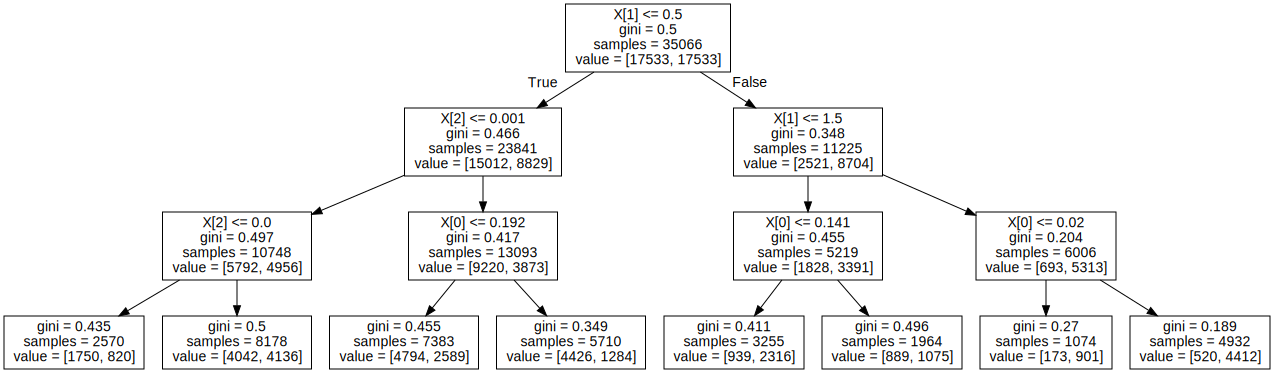

In [ ]:
model = DecisionTreeClassifier(random_state = 42,
  min_samples_leaf= 1, 
  min_samples_split= 4,
  max_depth= 3, 
  criterion= "gini")

model.fit(X_train.iloc[:,[0,3,11]], y_train)

from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(model, out_file=None)  
graph = graphviz.Source(dot_data)  
graph

#### Random Forest

In [ ]:
print("--------RF--------")
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)


y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

--------RF--------
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      5832
           1       0.52      0.49      0.50      1668

    accuracy                           0.79      7500
   macro avg       0.69      0.68      0.68      7500
weighted avg       0.78      0.79      0.78      7500

      0    1
0  5090  742
1   858  810


In [ ]:
from sklearn.model_selection import cross_val_score
import optuna
def objective(trial):
  params_grid = {
      "n_estimators" : trial.suggest_int("n_estimators",1, 100),
      "max_depth" : trial.suggest_int("max_depth", 5, 50),
      "min_samples_split": trial.suggest_int("min_sample_split", 2, 15),
      "min_samples_leaf": trial.suggest_int("min_sample_leaf", 1, 60),
      "max_features": trial.suggest_categorical("max_festures", ["auto", "sqrt"])
  }
  model = RandomForestClassifier(random_state = 42, **params_grid)
  score = cross_val_score(model, X_train, y_train, cv = 10).mean()
  return score

#
study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials = 100)
trial = study.best_trial
print("Best Score: ", trial.value)
print("Best Params: ")
for key, value in trial.params.items():
    print("  {}= {}, ".format(key, value))

[I 2022-11-16 09:41:08,350] A new study created in memory with name: no-name-87b81675-3498-4999-a5d8-4a3cf5336591
[I 2022-11-16 09:42:14,716] Trial 0 finished with value: 0.7890880532147342 and parameters: {'n_estimators': 82, 'max_depth': 20, 'min_sample_split': 6, 'min_sample_leaf': 12, 'max_festures': 'sqrt'}. Best is trial 0 with value: 0.7890880532147342.
[W 2022-11-16 09:42:16,957] Trial 1 failed because of the following error: KeyboardInterrupt()
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-60-ab7b534e7924>", line 12, in objective
    score = cross_val_score(model, X_train, y_train, cv = 10).mean()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 520, in cross_val_score
    error_score=error_score,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 28

KeyboardInterrupt: ignored

In [ ]:
# Tuned RF
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 42, n_estimators = 199, 
  max_depth= 87, 
  min_samples_split= 4 ,
  min_samples_leaf = 1,
  max_features = "sqrt")
model.fit(X_train, y_train)


y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      5832
           1       0.52      0.49      0.50      1668

    accuracy                           0.79      7500
   macro avg       0.69      0.68      0.68      7500
weighted avg       0.78      0.79      0.78      7500

      0    1
0  5072  760
1   849  819


In [ ]:
# fitting DT and RF using top 3 features

X_train.iloc[:,[0,3,11]]
# Tuned DT


model = DecisionTreeClassifier(random_state = 42,
  min_samples_leaf= 1, 
  min_samples_split= 4,
  max_depth= 13, 
  criterion= "gini")

model.fit(X_train.iloc[:,[0,3,11]], y_train)

y_predict = model.predict(X_test.iloc[:,[0,3,11]])

print("----------Decision Tree with top 3 features----------")
print(classification_report(y_test, y_predict))


from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 42, n_estimators = 199, 
  max_depth= 87, 
  min_samples_split= 4 ,
  min_samples_leaf = 1,
  max_features = "sqrt")
model.fit(X_train.iloc[:,[0,3,11]], y_train)


y_predict = model.predict(X_test.iloc[:,[0,3,11]])
print("----------Random Forest with top 3 features----------")
print(classification_report(y_test, y_predict))

----------Decision Tree with top 3 features----------
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      5832
           1       0.46      0.46      0.46      1668

    accuracy                           0.76      7500
   macro avg       0.66      0.66      0.66      7500
weighted avg       0.76      0.76      0.76      7500

----------Random Forest with top 3 features----------
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      5832
           1       0.42      0.42      0.42      1668

    accuracy                           0.74      7500
   macro avg       0.63      0.63      0.63      7500
weighted avg       0.74      0.74      0.74      7500



### SVM

In [ ]:
from sklearn.svm import SVC
model = SVC(random_state=42,kernel='linear')
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

KeyboardInterrupt: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV
param_space = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}


clf = GridSearchCV(model, param_space, n_jobs=-1, cv=10)
#clf.fit(X_train, y_train)

print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))




AttributeError: ignored

In [ ]:
clf_svm = SVC(random_state=42,C=10,kernel='rbf')
clf_svm.fit(X_train, y_train)
y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

AttributeError: ignored

### kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)


print(classification_report(y_test, y_predict))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris


knn = KNeighborsClassifier(n_neighbors=10)
sfs = SequentialFeatureSelector(knn, n_features_to_select=5)
sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=10),
                          n_features_to_select=5)


In [ ]:
print("Using these features:")
print(sfs.get_feature_names_out())
print("")
print("--------------------Result for kNN--------------------")
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train.iloc[:,[0,3,4,5,6]], y_train)

y_predict = classifier.predict(X_test.iloc[:,[0,3,4,5,6]])

print(classification_report(y_test, y_predict))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
knn = KNeighborsClassifier(n_neighbors=2) # ml_algo used = knn
sfs = SFS(knn, 
           k_features=10, 
           forward=True, # if forward = True then SFS otherwise SBS
           floating=False, 
           verbose=2,
           scoring='accuracy'
           )
sfs.fit(X_train, y_train)
sfs.k_feature_names_


In [ ]:
list(sfs.k_feature_idx_)
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train.iloc[:,list(sfs.k_feature_idx_)], y_train)

y_predict = classifier.predict(X_test.iloc[:,list(sfs.k_feature_idx_)])

print(classification_report(y_test, y_predict))

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

#Train the model using the training sets
model.fit(X_train, y_train)

#Predict the response for test dataset
y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))


In [ ]:
#model.theta_
#model.var_
#join(model.theta_)
array = X_train.columns.values
df = pd.DataFrame(array, columns = ['feature'])
df2 = pd.DataFrame(model.theta_).transpose()
df3 = df.join(df2).transpose()
df3.iloc[:,14:19]


### Multi Layer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(50,100,150), max_iter=300,activation = 'logistic',solver='sgd',random_state=1)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

In [ ]:
model = MLPClassifier(max_iter=300,random_state=1)

parameter_space = {
    'hidden_layer_sizes': [(10,50), (50,100), (10,50,100),(20,20,20),(100,30,10),(20,20)], # each tuple is one construct...
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Feature importance provided by sklearn

In [ ]:
def get_feature_importance(clsf, ftrs):
    imp = clsf.feature_importances_.tolist()
    feat = ftrs
    result = pd.DataFrame({'feat':feat,'score':imp})
    result = result.sort_values(by=['score'],ascending=False)
    return result


features = ['LIMIT_BAL', 'SEX', 'AGE', 'PAY_0', 'PAY_2',
        'PAY_4', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT3', 'BILL_AMT5', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','FEMALE','MARRIED','SINGLE']
classifier = RandomForestClassifier(random_state = 42)

classifier.fit(X_train, y_train)

get_feature_importance(classifier, features).transpose()

#sort = classifier.feature_importances_.argsort()
##plt.barh(features, classifier.feature_importances_[sort])
#plt.xlabel("Feature Importance")

In [5]:
X_train
features = ['LIMIT_BAL', 'SEX', 'AGE', 'PAY_0', 'PAY_2',
        'PAY_4', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT3', 'BILL_AMT5', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','FEMALE','MARRIED','SINGLE']
std = np.std([tree.feature_importances_ for tree in classifier.estimators_], axis=0)
std

NameError: name 'X_train' is not defined